In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Se dropea el label Id
df.drop(columns=["Id"], inplace=True)
df.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Visualización de Datos

[Text(0, 0.5, 'Sepal Width'),
 Text(0.5, 0, 'Sepal Length'),
 Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

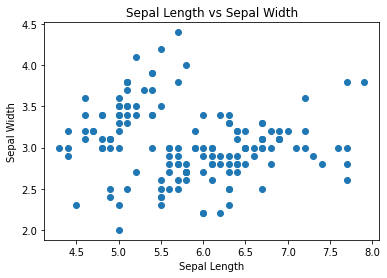

In [4]:
ax = plt.axes()
ax.scatter(df["SepalLengthCm"], df["SepalWidthCm"])

ax.set(xlabel='Sepal Length',
       ylabel='Sepal Width',
       title='Sepal Length vs Sepal Width')

Text(0.5, 0, 'Size (cm)')

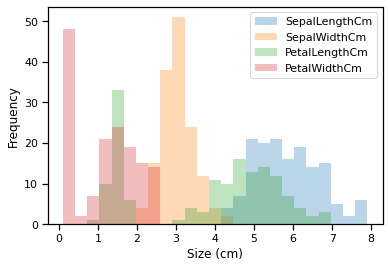

In [5]:
sns.set_context('notebook')
ax = df.plot.hist(bins=25, alpha=0.3)
ax.set_xlabel('Size (cm)')

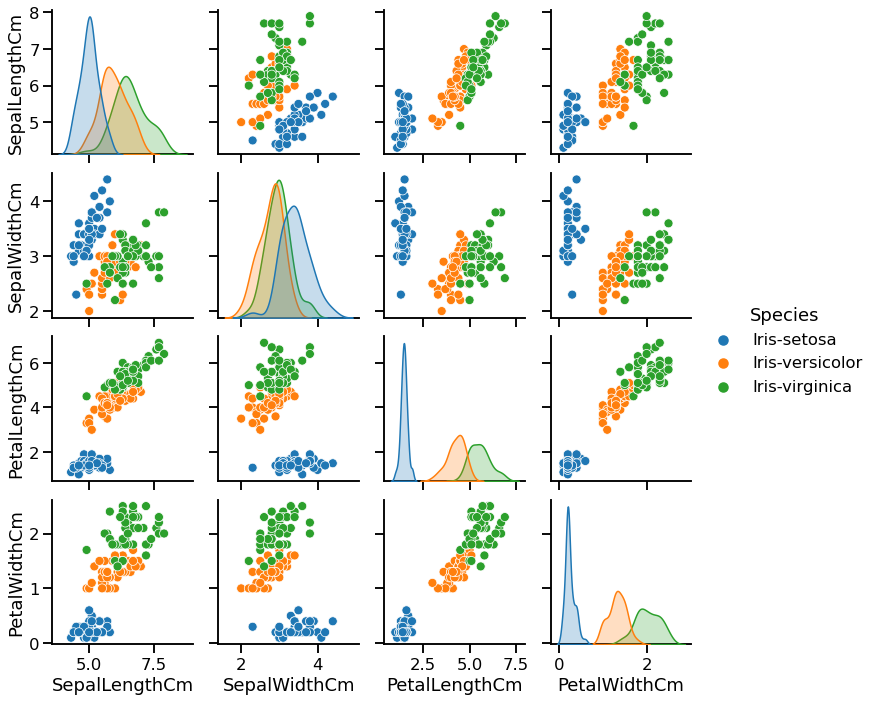

In [6]:
sns.set_context('talk')
sns.pairplot(df, hue='Species')

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
clf = tree.DecisionTreeClassifier()

y = df["Species"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X = df.drop(columns=["Species"]).values

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y_encoded, test_size=0.3,
random_state=42, shuffle=True)

In [9]:
clf = clf.fit(train_X, train_y)

[Text(968.75, 1730.2083333333333, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(819.7115384615386, 1415.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(1117.7884615384617, 1415.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(596.1538461538462, 1101.0416666666667, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(298.0769230769231, 786.4583333333335, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(149.03846153846155, 471.875, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(447.11538461538464, 471.875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(894.2307692307693, 786.4583333333335, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(745.1923076923077, 471.875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1043.269230769231, 471.875, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(894.2307692307693, 157.29166666666674, '

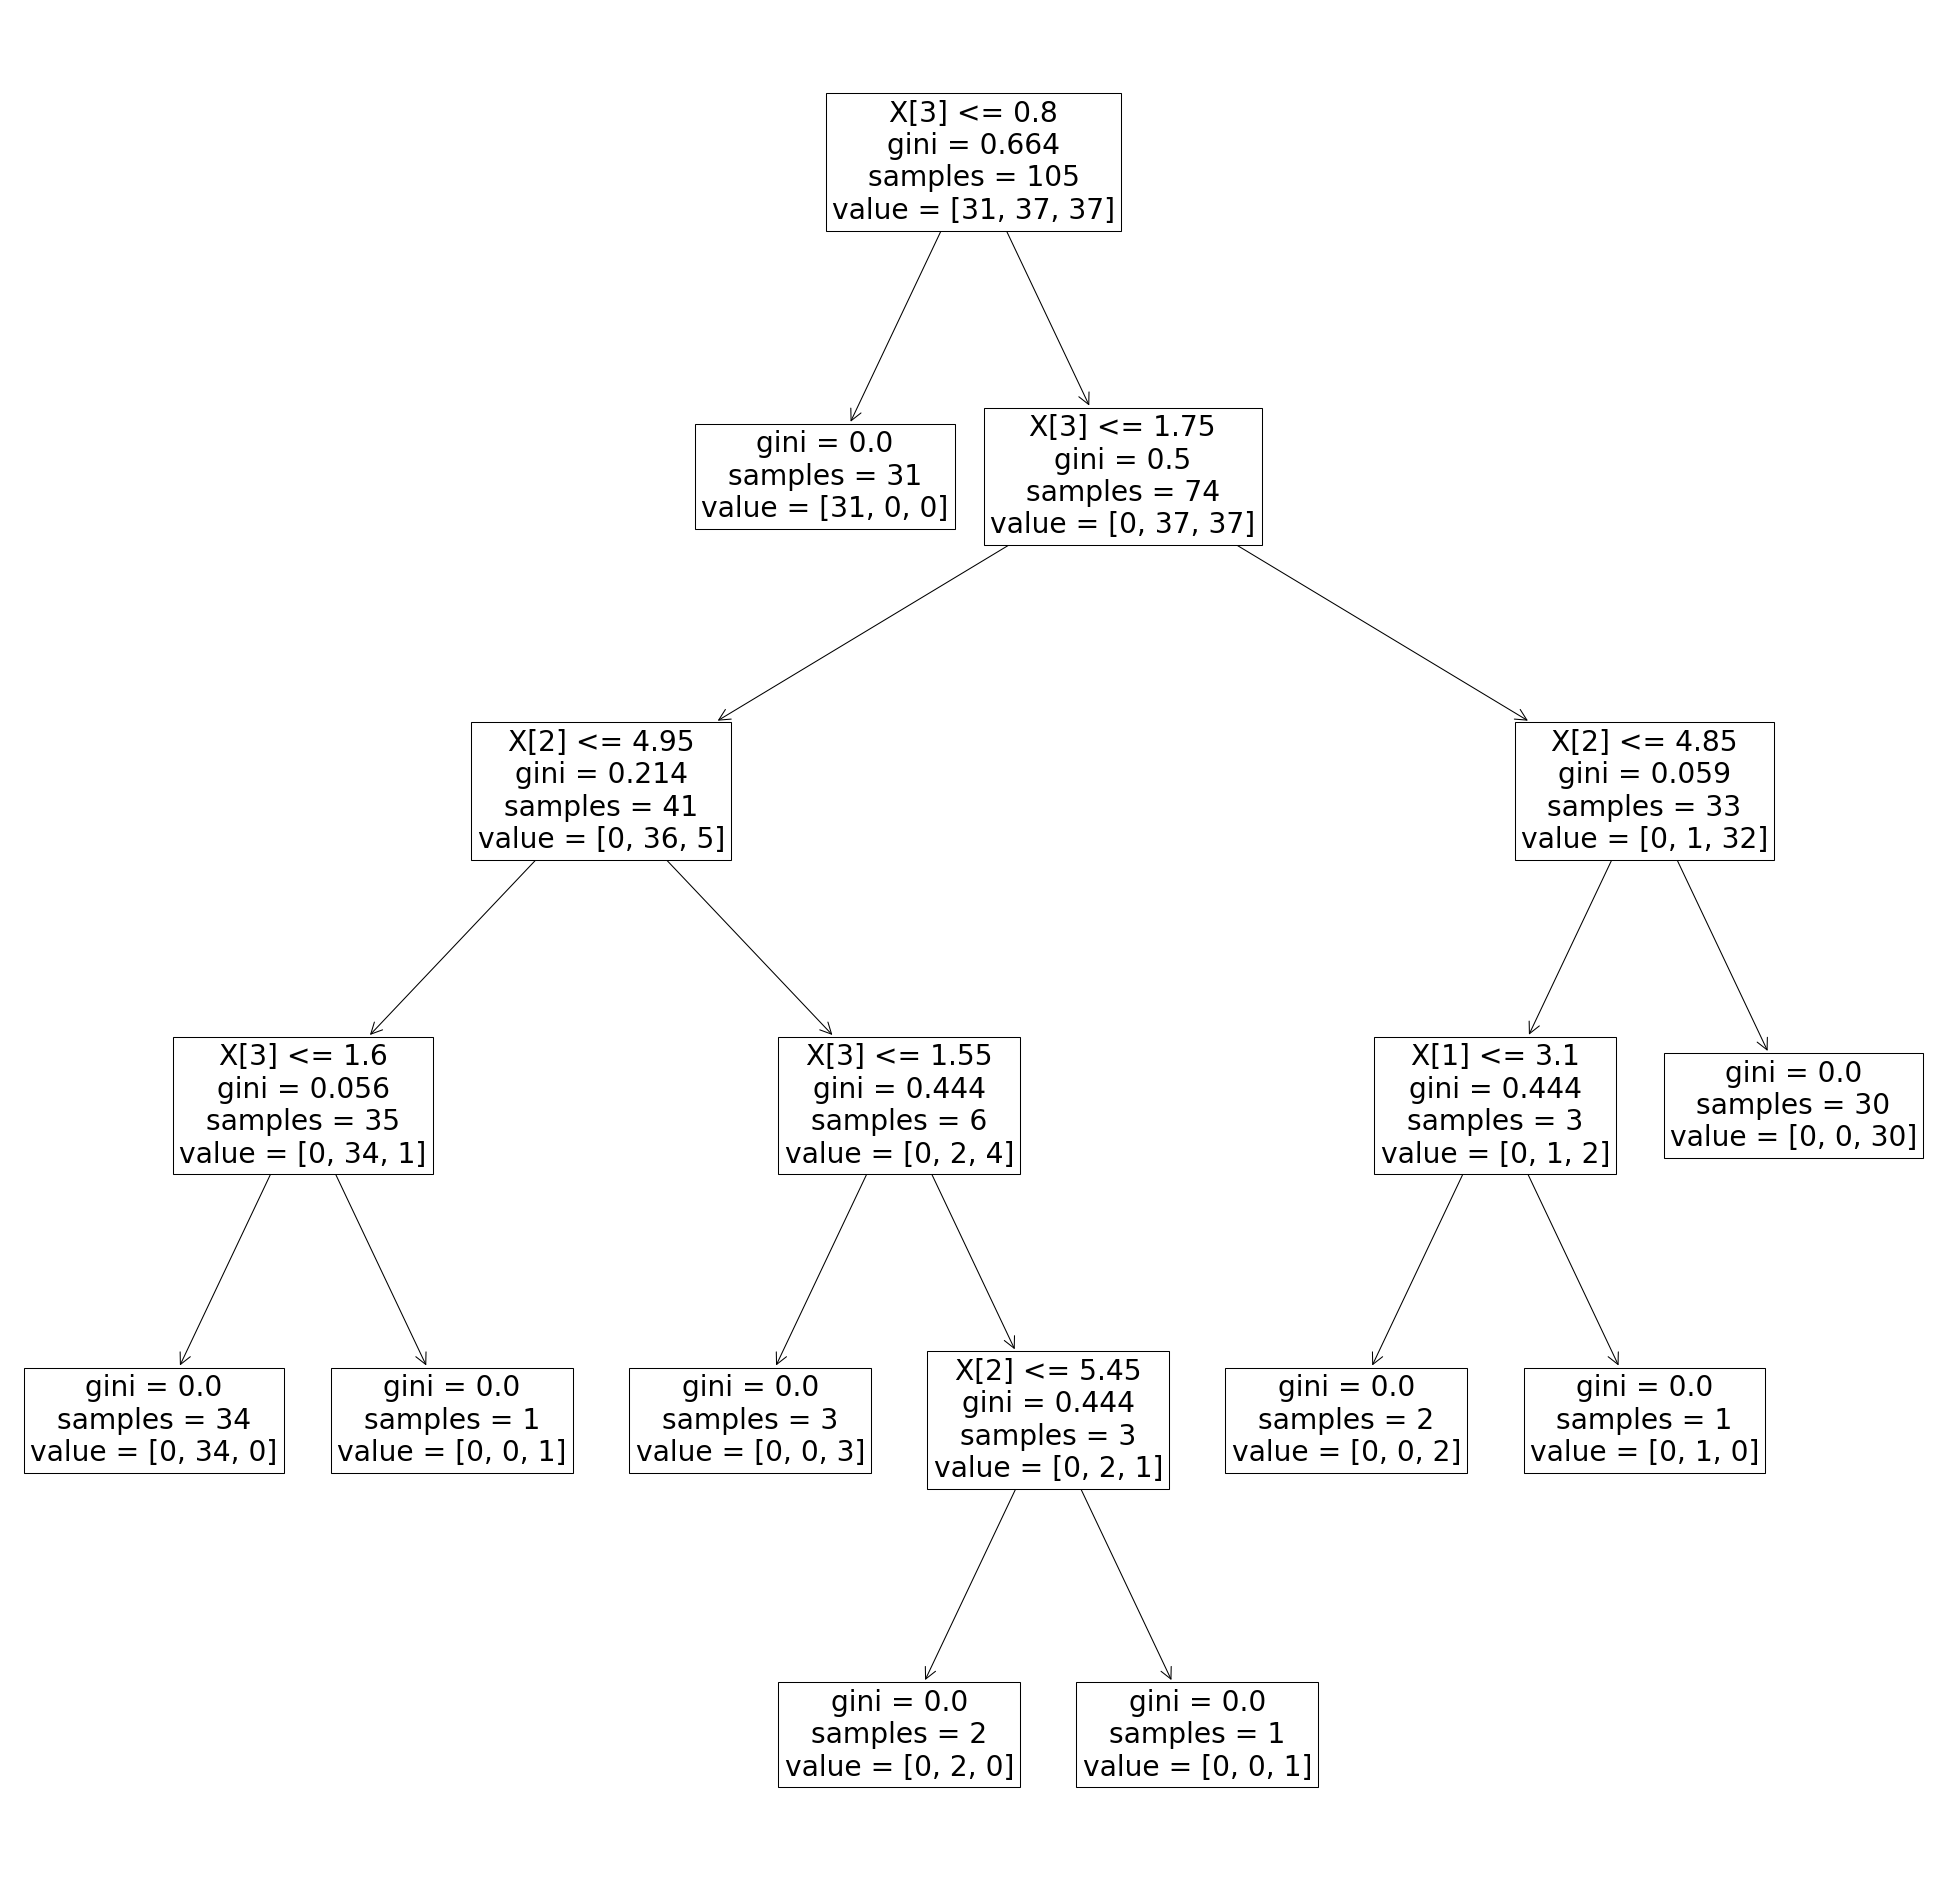

In [10]:
plt.figure(dpi=50, figsize=(50,50))
tree.plot_tree(clf)

In [11]:
y_pred = clf.predict(test_X)
print("Predicted vs Expected")
print(y_pred)
print(test_y)

Predicted vs Expected
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


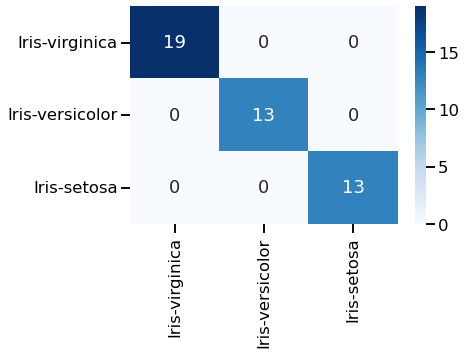

In [12]:
from sklearn.metrics import confusion_matrix
test_y_inv = le.inverse_transform(test_y)
y_pred_inv = le.inverse_transform(y_pred)
categories = set(df["Species"])
cf_matrix = confusion_matrix(test_y_inv, y_pred_inv)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', xticklabels=categories, yticklabels=categories)
